# Map of correlations

In [1]:
import xarray as xr
from pathlib import Path

import intake
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs

import numpy as np
import pandas as pd
import os

/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [3]:
# to get the land mask
# define paths
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'P1D'
zoom = 'z5'

# define the fname
fpath = f'{datapath}/{file}_mean_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)


In [4]:
# UM model

# define paths
datapath = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/'
model = 'UM'
zoom = 'z5'
fpath = f'{datapath}/data.healpix.PT1H.{zoom}.zarr'

# open the zarr file
dum = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in dum.data_vars.items():
    print(f'{key}: {longname.long_name}')


clivi: atmosphere_mass_content_of_cloud_ice
clt: cloud_area_fraction
clwvi: atmosphere_mass_content_of_cloud_condensed_water
hflsd: surface_downward_latent_heat_flux
hfssd: surface_downward_sensible_heat_flux
huss: specific_humidity
pr: precipitation_flux
prs: solid_precipitation_flux
prw: atmosphere_mass_content_of_water_vapor
ps: surface_air_pressure
psl: air_pressure_at_mean_sea_level
rlds: surface_downwelling_longwave_flux_in_air
rldscs: surface_downwelling_longwave_flux_in_air_clear_sky
rlut: toa_outgoing_longwave_flux
rlutcs: toa_outgoing_longwave_flux_clear_sky
rsds: surface_downwelling_shortwave_flux_in_air
rsdscs: surface_downwelling_shortwave_flux_in_air_clear_sky
rsdt: toa_incoming_shortwave_flux
rsut: toa_outgoing_shortwave_flux
rsutcs: toa_outgoing_shortwave_flux_clear_sky
tas: air_temperature
ts: surface_temperature
uas: eastward_wind
vas: northward_wind


/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


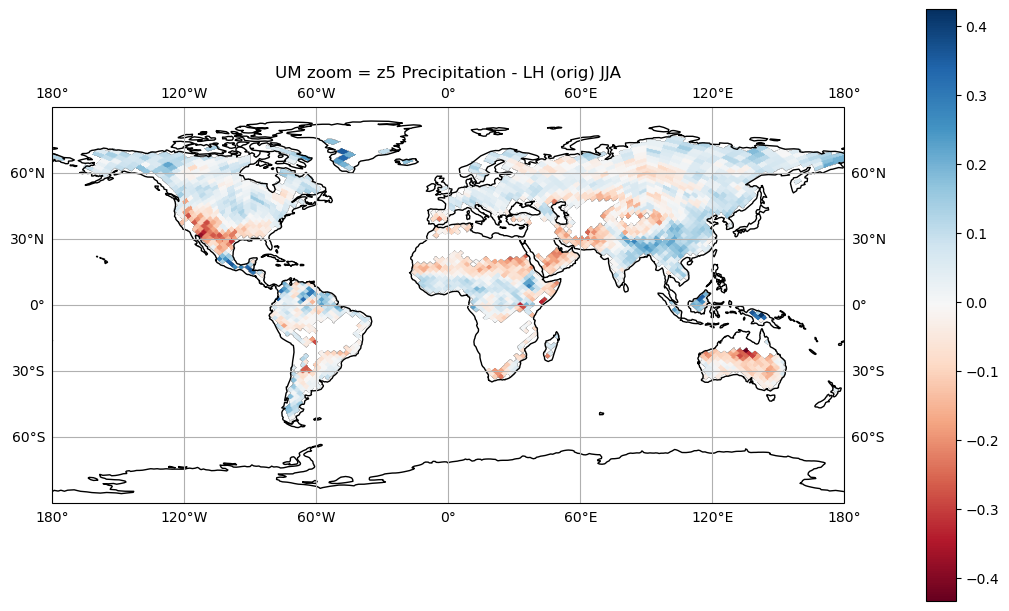

/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [6]:
dum_jja = dum.sel(time=dum['time'].dt.month.isin([6, 7, 8]))
icon_pr = dum_jja['pr'].mean('time')* 86400

# latent heat

icon_y1  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), dum['hflsd'], np.nan)

icon_corr_lh_pr      = xr.where((icon_pr>=.1)&(ds['sftlf']>0.9), 
                                xr.corr(dum_jja['pr'], icon_y1, dim='time'), np.nan) #.values
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(icon_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'{model} zoom = {zoom} Precipitation - LH (orig) JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

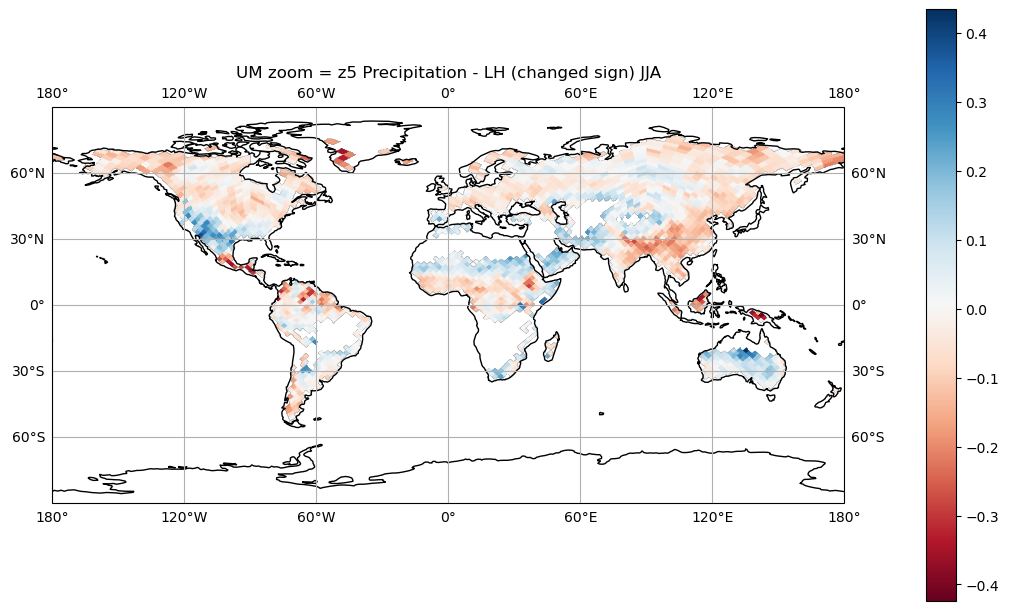

In [7]:
dum_jja = dum.sel(time=dum['time'].dt.month.isin([6, 7, 8]))
icon_pr = dum_jja['pr'].mean('time')* 86400

# latent heat

icon_y1  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), dum['hflsd']*-1, np.nan)

icon_corr_lh_pr      = xr.where((icon_pr>=.1)&(ds['sftlf']>0.9), 
                                xr.corr(dum_jja['pr'], icon_y1, dim='time'), np.nan) #.values
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(icon_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'{model} zoom = {zoom} Precipitation - LH (changed sign) JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

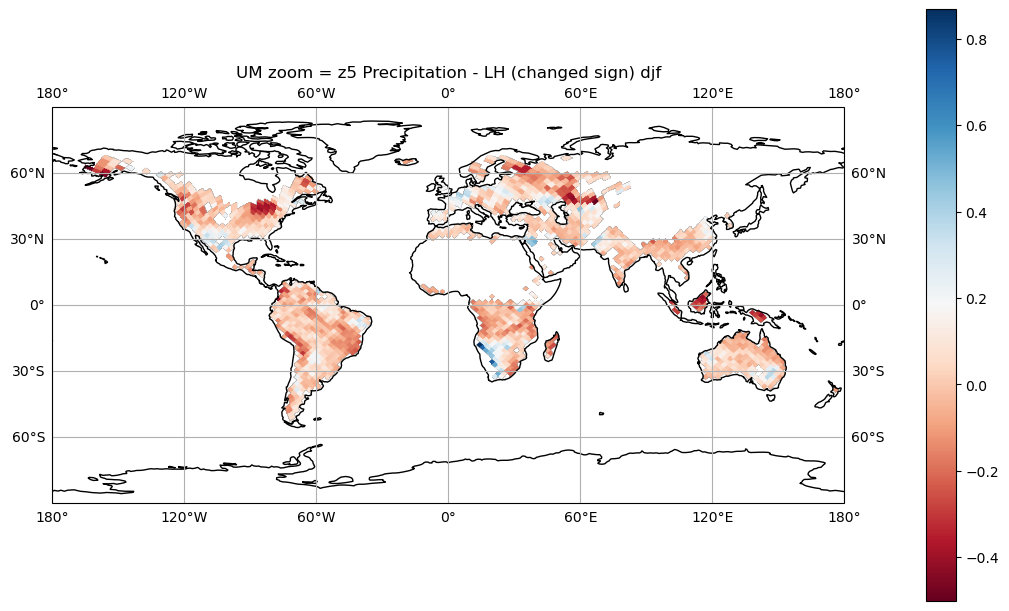

In [9]:
# for austral summer

dum_djf = dum.sel(time=dum['time'].dt.month.isin([12, 13, 14]))
icon_pr = dum_djf['pr'].mean('time')* 86400

# latent heat

icon_y1  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), dum_djf['hflsd']*-1, np.nan)

icon_corr_lh_pr      = xr.where((icon_pr>=.1)&(ds['sftlf']>0.9), 
                                xr.corr(dum_djf['pr'], icon_y1, dim='time'), np.nan) #.values
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(icon_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'{model} zoom = {zoom} Precipitation - LH (changed sign) djf')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()